Code example for talk, not meant to be read. 

<IPython.core.display.Javascript object>


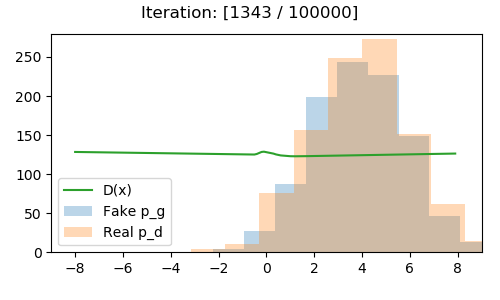

/home/fhv/anaconda3/envs/ml18/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


KeyboardInterrupt: 

In [2]:
%matplotlib notebook 
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt # plot how normal distribution changes. 

"""
    Construct a very simple generator and a somehow larger discriminator. 
    Train the generator on N(0,1) with real data N(4,2) and plot each iteration. 
"""

fig, ax = plt.subplots(figsize=(5, 3))

def plot(): 
    ax.cla()
    ax.hist(generator.predict_on_batch(noise) , alpha=0.3, label="Fake p_g")
    ax.hist(real_data , alpha=0.3, label="Real p_d")
    xs = np.arange(-8, 8, 0.1)
    pred = discriminator.predict_on_batch(xs)
    ax.plot(xs, pred*250, label="D(x)")
    ax.legend(loc=3)
    ax.set_ylim([0, 280])
    ax.set_xlim([-9, 9])
    
    fig.suptitle("Iteration: [%i / %i]"%(i, iterations))
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.canvas.draw()
    plt.pause(.01)

# number of samples. 
n = 1000
iterations = 100000
repeat = 10

# define generator
generator = Sequential()
generator.add(Dense(1, input_dim=1)) # one neuron except bias, don't have the relu activation!

# define discrimiantor
discriminator = Sequential()
discriminator.add(Dense(10, input_dim=1, activation="relu")) # non linearity has some use here. 
discriminator.add(Dense(1,  activation="sigmoid"))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam())

# Combine models
gan = Sequential()
gan.add(generator)
discriminator.trainable = False # from the gan model we freeze discriminator to use it as loss function
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

# Do several updates, plot some interval of iterations fake / real data. 

for i in range(iterations):
    
    noise     = np.random.normal(0, 1, size=(n, 1))
    fake_data = generator.predict_on_batch(noise)
    real_data = np.random.normal(4, 2, size=(n, 1))
    
    disc_X = np.concatenate((real_data, fake_data), axis=0)
    disc_y = np.concatenate((np.zeros(n), np.ones(n)), axis=0) # flip labels since we min instead of max. 
    
    plot()
    for j in range(repeat): discriminator.train_on_batch(x=disc_X, y=disc_y)
    for j in range(repeat): gan.train_on_batch(x=noise, y=np.zeros(n))



Translate between normal distributions, e.g. 

$p_x = N(\mu_x, \sigma^2_x)$ and $p_y = N(\mu_y, \sigma^2_y)$ and we don't know the specific values of $\mu_x,\mu_x$ and $\sigma_x, \sigma_y$

extend afterwards to more interesting case, e.g. translate between cifar dogs and cats. 


Inspired by https://github.com/eriklindernoren/Keras-GAN/blob/master/cyclegan/cyclegan.py 

<IPython.core.display.Javascript object>


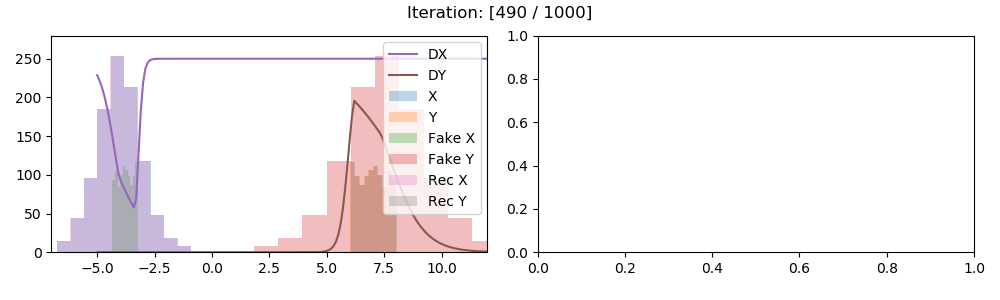

/home/fhv/anaconda3/envs/ml18/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


KeyboardInterrupt: 

In [2]:
%matplotlib notebook 
import keras
import numpy as np
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input
from keras.optimizers import Adam
import matplotlib.pyplot as plt # plot how normal distribution changes. 

"""
    Translate between different normal distributions. 
    p_x = N(2, 1) and p_y = N(-2, 1)
"""

fig, ax = plt.subplots(1, 2, figsize=(10, 3)) 

def plot(display): 
    ax[0].cla()
    ax[0].hist(X, alpha=0.3, label="X")
    ax[0].hist(Y, alpha=0.3, label="Y")
    
    xs = np.arange(-5, 15, 0.1)
    
    if display == 1 or display == 2: 
        ax[0].hist(fake_X, alpha=0.3, label="Fake X")
        ax[0].hist(fake_Y, alpha=0.3, label="Fake Y") 
        
        ax[0].plot(xs, DX.predict(xs)*250, label="DX")
        ax[0].plot(xs, DY.predict(xs)*250, label="DY")
    
    if display == 0 or display == 2:
        ax[0].hist(rec_X, alpha=0.3, label="Rec X")
        ax[0].hist(rec_Y, alpha=0.3, label="Rec Y") 
    
    ax[0].legend(loc=1)
    ax[0].set_ylim([0, 280])
    ax[0].set_xlim([-7, 12])
    
    fig.suptitle("Iteration: [%i / %i]"%(i, iterations))
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.canvas.draw()
    #plt.savefig("gifs/cycle_gan_normals/%i.png"%i)
    plt.pause(.01)

# number of samples. 
n          = 1000
iterations = 1000
repeat     = 10

# For both F and G we know a single neuron with bias is sufficient. 


# G: X -> Y
G = Sequential()
G.add(Dense(1, input_dim=1))

# DY: discriminate {y} and {G(x)}
DY = Sequential()
DY.add(Dense(10, input_dim=1, activation="relu")) 
DY.add(Dense(1,  activation="sigmoid"))
DY.compile(loss='binary_crossentropy', optimizer=Adam(0.005), metrics=['acc'])

# F: Y -> X
F = Sequential()
F.add(Dense(1, input_dim=1))

# DX: discriminate {x} and {F(y)}
DX = Sequential()
DX.add(Dense(10, input_dim=1, activation="relu")) 
DX.add(Dense(1,  activation="sigmoid"))
DX.compile(loss='binary_crossentropy', optimizer=Adam(0.005), metrics=['acc'])

input_X = Input(shape=(1, ))
input_Y = Input(shape=(1, ))

fake_X = F(input_Y)
fake_Y = G(input_X)

rec_X = F(fake_Y)
rec_Y = G(fake_X)

DX.trainable = False 
DY.trainable = False # freeze discriminator to use it as loss function

adv_X = DX(fake_X)
adv_Y = DY(fake_Y)

combined = Model(inputs =[input_X, input_Y], 
                 outputs=[adv_X,   adv_Y,
                          rec_X,   rec_Y])

combined.compile(loss         = ['binary_crossentropy', 'binary_crossentropy', 'mae', 'mae'],
                 loss_weights = [1, 1, 5, 5],
                 optimizer    = Adam(0.01) )

# Adversarial loss ground truths
valid = np.ones(n)
fake  = np.zeros(n)

for i in range(iterations):
    #print("\r--- [%i / %i] ---"%(i, iterations), end="")
    
    X = np.random.normal(-4, 1, size=(n, 1))
    Y = np.random.uniform(6, 8, size=(n, 1))
    
    fake_X = F.predict(Y)
    fake_Y = G.predict(X)
    
    rec_X = F.predict(fake_Y)
    rec_Y = G.predict(fake_X)

    # Update discriminator
    for j in range(10):
        DY.train_on_batch(Y, valid)
        DY.train_on_batch(fake_Y, fake) 

        DX.train_on_batch(X, valid)
        DX.train_on_batch(fake_X, fake)
    
    # Update generator
    combined.train_on_batch([X, Y], [valid, valid, X, Y])
    
    if i % 10 == 0: 
        plot(2)
    
        